In [331]:
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, Activation
from tensorflow.keras.utils import to_categorical 

In [213]:
df = pd.read_csv(r'/Users/andrewbilbrey/Downloads/UrbanSound8K/metadata/UrbanSound8K.csv')


In [214]:
sound1, sr1 = librosa.load(r'/Users/andrewbilbrey/Downloads/UrbanSound8K/audio/fold8/33340-7-13-0.wav')
sound2, sr2 = librosa.load(r'/Users/andrewbilbrey/Downloads/UrbanSound8K/audio/fold1/203356-3-0-0.wav')

In [119]:
df["class"].value_counts()

dog_bark            1000
air_conditioner     1000
street_music        1000
jackhammer          1000
drilling            1000
engine_idling       1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [127]:
df.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


Visualizations for EDA (random audio files)

<module 'matplotlib.pyplot' from '/Users/andrewbilbrey/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

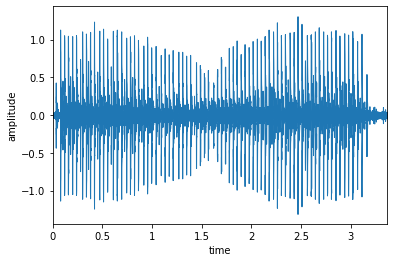

In [120]:
librosa.display.waveplot(sound1, sr= sr1)
plt.xlabel("time")
plt.ylabel("amplitude")
plt

<module 'matplotlib.pyplot' from '/Users/andrewbilbrey/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

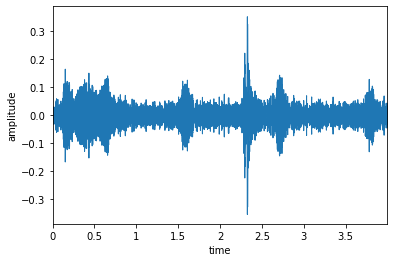

In [121]:
librosa.display.waveplot(sound2, sr= sr2)
plt.xlabel("time")
plt.ylabel("amplitude")
plt

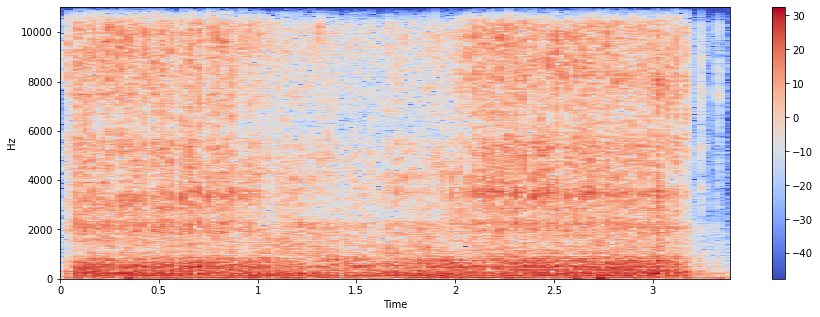

In [122]:
art1 = librosa.stft(sound1)
art1db = librosa.amplitude_to_db(abs(art1))
plt.figure(figsize = (15, 5))
librosa.display.specshow(art1db, sr= sr1, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

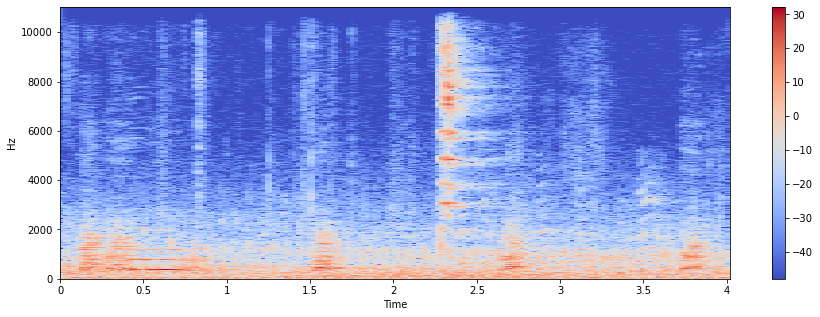

In [125]:
art2 = librosa.stft(sound2)
art2db = librosa.amplitude_to_db(abs(art2))
plt.figure(figsize = (15, 5))
librosa.display.specshow(art2db, sr= sr2, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

Mel Frequency Cepstral Coefficient Feature Extraction

In [75]:
features = []
labels = []

def feat_ext (row):
    for a in range (8732):
        cat5 = r'/Users/andrewbilbrey/Downloads/UrbanSound8K/audio/fold' + str(df["fold"][a]) + '/' + df["slice_file_name"][a]
        TE , sr3 = librosa.load(cat5)
        MFCC = np.mean(librosa.feature.melspectrogram(y= TE, sr = sr3).T, axis = 0)
        features.append(MFCC)
        labels.append(df["classID"][a])
    return [features, labels]
    

In [76]:
hold = feat_ext(df)

In [77]:
hold = np.array(hold)
stage = hold.transpose()


In [101]:
X_ = stage[:, 0]
Y = stage[:, 1]
print(X_.shape, Y.shape)
TE = np.empty([8732, 128])


(8732,) (8732,)


In [102]:
for i in range(8732):
    X[i] = (X_[i])

In [103]:
Y = to_categorical(Y)

In [104]:
print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


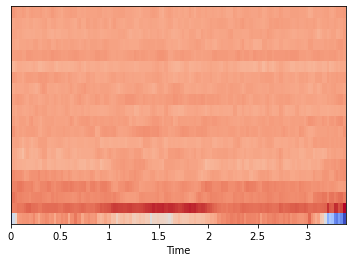

In [133]:
lincoln = librosa.feature.mfcc(sound1, sr=sr1)
librosa.display.specshow(lincoln, sr = sr1, x_axis='time')

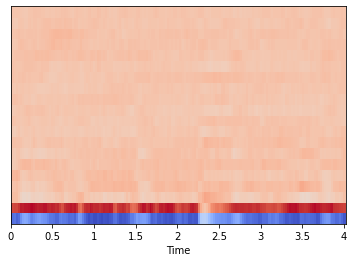

In [134]:
nebraska = librosa.feature.mfcc(sound2, sr=sr2)
librosa.display.specshow(nebraska, sr = sr2, x_axis='time')

In [382]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [383]:
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)

In [384]:
model = Sequential()

In [385]:
model.add(Conv2D(32, (2, 2), padding = "same", activation = "elu", input_shape = (16,8,1)))
model.add(MaxPool2D(pool_size=(1, 1)))
model.add(Conv2D(64, (2, 2), padding = "valid", activation = "selu"))
model.add(MaxPool2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(475, activation = "sigmoid"))
model.add(Dense(10, activation = "softmax"))

In [386]:
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [387]:
model.fit(X_train, Y_train, epochs = 35, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/35
66/66 [==============================] - 2s 27ms/step - loss: 2.0164 - accuracy: 0.2959 - val_loss: 1.8774 - val_accuracy: 0.3688
Epoch 2/35
66/66 [==============================] - 2s 27ms/step - loss: 1.7971 - accuracy: 0.3895 - val_loss: 1.7735 - val_accuracy: 0.3935
Epoch 3/35
66/66 [==============================] - 2s 26ms/step - loss: 1.6966 - accuracy: 0.4282 - val_loss: 1.6959 - val_accuracy: 0.4315
Epoch 4/35
66/66 [==============================] - 2s 26ms/step - loss: 1.6289 - accuracy: 0.4477 - val_loss: 1.6558 - val_accuracy: 0.4315
Epoch 5/35
66/66 [==============================] - 2s 27ms/step - loss: 1.5768 - accuracy: 0.4674 - val_loss: 1.6094 - val_accuracy: 0.4315
Epoch 6/35
66/66 [==============================] - 2s 30ms/step - loss: 1.5319 - accuracy: 0.4767 - val_loss: 1.5714 - val_accuracy: 0.4521
Epoch 7/35
66/66 [==============================] - 2s 30ms/step - loss: 1.4908 - accuracy: 0.4927 - val_loss: 1.5438 - val_accuracy: 0.4705
Epoch 8/35
66

In [388]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 16, 8, 32)         160       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 16, 8, 32)         0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 15, 7, 64)         8256      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 15, 7, 64)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 6720)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 475)               3192475   
_________________________________________________________________
dense_50 (Dense)             (None, 10)              

In [389]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

69/69 [==============================] - 0s 4ms/step - loss: 1.1505 - accuracy: 0.6285
[1.1505407094955444, 0.6284928917884827]
